# Cross Validation and Prediction Using Regression Tree

### Challenge

## Decision Tree Regressor

Task 1

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

### 1. Loading Data

In [39]:
data_df1=pd.read_csv('/content/DS2_C5_S5_OldCars_Data_Challenge.csv')
#data_df=data_df1
data_df=data_df1.iloc[:,1:]

In [ ]:
data_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [44]:
data_df = data_df.assign(Mileage = lambda x: x['Mileage'].str.extract('(\d+.\d+)')) #\d+.\d+--> extracts digits with decimals
data_df = data_df.assign(Engine = lambda x: x['Engine'].str.extract('(\d+)'))
data_df = data_df.assign(Power = lambda x: x['Power'].str.extract('(\d\d+.\d+)'))
data_df = data_df.assign(New_Price = lambda x: x['New_Price'].str.extract('(\d+.\d+)'))

In [ ]:
data_df.head()

### 2. Data Exploration

In [ ]:
data_df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7118 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


### Task 3. Preprocessing

In [ ]:
# check missing values in data
print(data_df.isnull().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage               135
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64


In [ ]:
#removing column New_price as it has 6247 missing values
data_df.drop('New_Price',axis=1,inplace=True)

In [ ]:
print(data_df.columns)


Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


In [ ]:

# Converting object data types into categorical column
data_df['Name']=data_df['Name'].astype('category')
data_df['Location']=data_df['Location'].astype('category')
data_df['Fuel_Type']=data_df['Fuel_Type'].astype('category')
data_df['Transmission']=data_df['Transmission'].astype('category')
data_df['Owner_Type']=data_df['Owner_Type'].astype('category')
data_df['Mileage']=data_df['Mileage'].astype('float64')
data_df['Engine']=data_df['Engine'].astype('float64')
data_df['Power']=data_df['Power'].astype('float64')
#data_df['New_Price']=data_df['New_Price'].astype('category')


In [ ]:
# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data_df['Name_encode']= label_encoder.fit_transform(data_df['Name'])
data_df['Name_encode'].unique()

data_df['Location_encode']= label_encoder.fit_transform(data_df['Location'])
data_df['Location_encode'].unique()

data_df['Fuel_Type_encode']= label_encoder.fit_transform(data_df['Fuel_Type'])
data_df['Fuel_Type_encode'].unique()

data_df['Transmission_encode']= label_encoder.fit_transform(data_df['Transmission'])
data_df['Transmission_encode'].unique()

data_df['Owner_Type_encode']= label_encoder.fit_transform(data_df['Owner_Type'])
data_df['Owner_Type_encode'].unique()



#data_df['New_Price_encode']= label_encoder.fit_transform(data_df['New_Price'])
#data_df['New_Price_encode'].unique()



array([0, 2, 1, 3])

In [ ]:
# finding correlation
cor=data_df.corr()
cor
#cor.loc[:,'Mileage_encode'] 
# printing correlation of Mileage with every other var

,Year,Kilometers_Driven,Seats,Price,Name_encode,Location_encode,Fuel_Type_encode,Transmission_encode,Owner_Type_encode
Year,1.000000,-0.187859,0.008216,0.305327,0.016406,-0.027455,-0.131888,-0.099975,-0.385503
Kilometers_Driven,-0.187859,1.000000,0.090221,-0.011493,0.031892,-0.035586,-0.109530,0.031166,0.088485
Seats,0.008216,0.090221,1.000000,0.052225,0.163447,-0.034651,-0.295423,0.079328,0.008045
Price,0.305327,-0.011493,0.052225,1.000000,-0.101287,-0.116620,-0.305207,-0.586025,-0.094559
Name_encode,0.016406,0.031892,0.163447,-0.101287,1.000000,0.033469,-0.072004,0.136026,-0.026578
Location_encode,-0.027455,-0.035586,-0.034651,-0.116620,0.033469,1.000000,0.113209,0.048700,-0.029547
Fuel_Type_encode,-0.131888,-0.109530,-0.295423,-0.305207,-0.072004,0.113209,1.000000,0.125346,0.048425
Transmission_encode,-0.099975,0.031166,0.079328,-0.586025,0.136026,0.048700,0.125346,1.000000,0.001272
Owner_Type_encode,-0.385503,0.088485,0.008045,-0.094559,-0.026578,-0.029547,0.048425,0.001272,1.000000


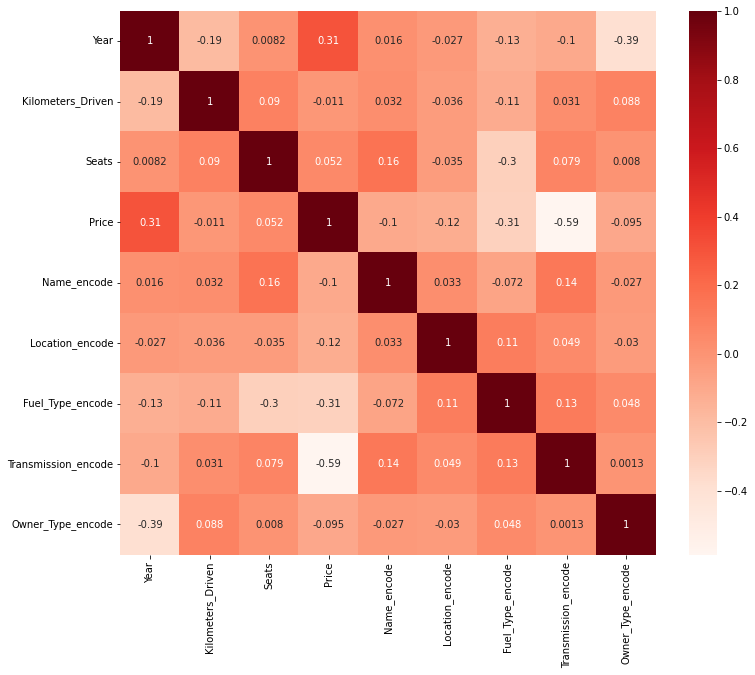

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with Mileage variable
cor_Mileage = (abs(cor["Mileage"])).sort_values(ascending=False)
print(cor_Mileage)


KeyError: ignored

In [ ]:
#Selecting highly correlated features with the target variable
relevant_features = cor_Mileage[(cor_Mileage!=1.0)]
high_corr_features = relevant_features[(relevant_features>=0.3)]
#print(relevant_features)
feat=high_corr_features.index.tolist()
feat

NameError: ignored

In [ ]:
type(feat)

list

In [ ]:
#df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

#imputation based method to fill in missing values of each column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = data_df.select_dtypes(include=numerics)
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5)
#df_filled=imputer.fit_transform(new_df).toseries()
df_filled = pd.DataFrame(imputer.fit_transform(new_df),columns=new_df.columns)
df_filled

,Year,Kilometers_Driven,Seats,Price,Name_encode,Location_encode,Fuel_Type_encode,Transmission_encode,Owner_Type_encode
0,2010.0,72000.0,5.0,1.750,1310.0,9.0,0.0,1.0,0.0
1,2015.0,41000.0,5.0,12.500,560.0,10.0,1.0,1.0,0.0
2,2011.0,46000.0,5.0,4.500,529.0,2.0,4.0,1.0,0.0
3,2012.0,87000.0,7.0,6.000,1160.0,2.0,1.0,1.0,0.0
4,2013.0,40670.0,5.0,17.740,23.0,3.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
7248,2011.0,89411.0,5.0,10.390,2013.0,5.0,1.0,1.0,0.0
7249,2015.0,59000.0,5.0,9.672,1988.0,9.0,4.0,0.0,0.0
7250,2012.0,28000.0,5.0,24.240,1499.0,8.0,1.0,1.0,0.0
7251,2013.0,52262.0,5.0,5.334,1988.0,10.0,4.0,0.0,3.0


In [ ]:
df_filled.isnull().sum()

Year                   0
Kilometers_Driven      0
Seats                  0
Price                  0
Name_encode            0
Location_encode        0
Fuel_Type_encode       0
Transmission_encode    0
Owner_Type_encode      0
dtype: int64

### Task 4. Modelling

In [ ]:
#Separating the features and target

X1=df_filled.iloc[:,0:3]
X2=df_filled.iloc[:,4:]
X = pd.concat([X1, X2], axis=1) #appends columns

#X=pd.concat(X3) # appends rows
y=df_filled.iloc[:,4]





In [ ]:
X.shape


(7253, 8)

In [ ]:
# Split into train and test set
## Hold out method

x_train, x_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=100)
print('Size of training dataset: ', x_train.shape)
print('Size of test dataset: ', x_test.shape)

Size of training dataset:  (5802, 8)
Size of test dataset:  (1451, 8)


In [ ]:
# Modelling using Tree Regressor
dtm = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_train,y_train)))

y_pred=dtm.predict(x_test)
print("R-Squared on test dataset={}".format(dtm.score(x_test,y_test)))

R-Squared on train dataset=0.9893752915224056
R-Squared on test dataset=0.9891400172730023


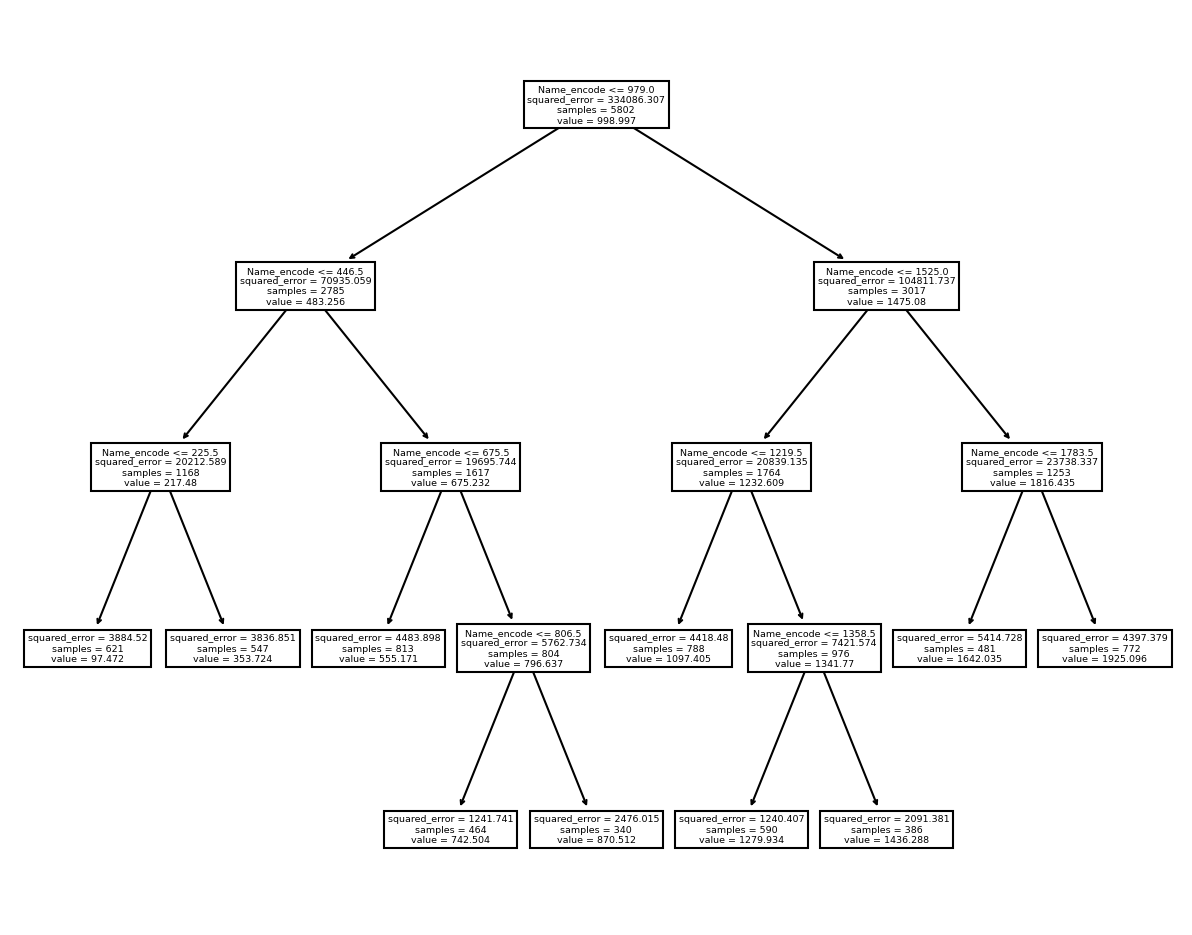

In [ ]:
#visualization of Regressor tree

from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dtm, feature_names=X.columns);

# Cross validation Techniques

Model comparision using diffrent cross validation techniques

# Hold out method - 
same as train_test split shown above

# Leave one out

In [ ]:
from sklearn.model_selection import LeaveOneOut
X1=df_filled.iloc[:,0:3]
X2=df_filled.iloc[:,4:]
X = pd.concat([X1, X2], axis=1) #appends columns
y=df_filled.iloc[:,4]



In [ ]:
LOO = LeaveOneOut()
model= DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
score1=cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=LOO)


In [ ]:
from numpy import mean
from numpy import absolute
from numpy import sqrt
print(mean(score1))



-3576.2053782979465


R2  score is not appropriate for LOO cross-validation. Since 𝑅2 is a measure of how close the data are to the fitted regression line, it's undefined for a point (a point cannot define a line).

i.e  The general cross_val_score will split the data into train and test with the given iterator, then fit the model with the train data and score on the test fold. And for regressions, r2_score is the default in scikit.

LeaveOneOut() is used as  cv iterator. So each fold will contain a single test case. In this case, R_squared will always be 0.

In [ ]:
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# K fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfolds = KFold(n_splits=10, shuffle= True,random_state=7)
model = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
score2 = cross_val_score(model, X, y,scoring='r2', cv=kfolds)

 

In [ ]:
print(mean(score2))

0.9892754610465744


# Stratified K fold

In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
stratifiedkf=StratifiedKFold(n_splits=5)
model = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
score=cross_val_score(model,X,y,scoring='r2',cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.98947439 0.989362   0.98938391 0.98902165 0.98931731]
Average Cross Validation score :0.9893118511307177


The cross validation techniques KFold, stratifiedKFold, train_test split all gives the R2 score of 0.98. The performance of each of the method on the data set is same